In [2]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
fish_target = fish['Species'].to_numpy()
fish_data = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

In [4]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, test_size=0.2, random_state=42
)

In [5]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [6]:
from sklearn.linear_model import SGDClassifier

In [7]:
sc = SGDClassifier(loss='log_loss') # 로지스틱 손실 함수 - binary crossentropy, categorical crossentropy

In [8]:
sc

,loss,'log_loss'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [12]:
sc.fit(train_scaled, train_target)

,loss,'log_loss'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [13]:
print("훈련세트:", sc.score(train_scaled, train_target))
print("테스트세트:", sc.score(test_scaled, test_target))

훈련세트: 0.7716535433070866
테스트세트: 0.6875


In [14]:
sc.partial_fit(train_scaled, train_target)

,loss,'log_loss'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [15]:
print("훈련세트:", sc.score(train_scaled, train_target))
print("테스트세트:", sc.score(test_scaled, test_target))

훈련세트: 0.9291338582677166
테스트세트: 0.90625


In [18]:
sc.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Roach', 'Perch'], dtype='<U9')

In [19]:
import numpy as np

np.round(sc.predict_proba(test_scaled[:5]), decimals=3)

array([[0.   , 0.   , 0.982, 0.   , 0.018, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ],
       [0.   , 0.   , 0.   , 0.998, 0.002, 0.   , 0.   ],
       [0.   , 0.   , 0.483, 0.   , 0.507, 0.   , 0.01 ],
       [0.   , 0.   , 0.956, 0.   , 0.044, 0.   , 0.   ]])

In [28]:
sc = SGDClassifier(max_iter=1 , tol=None, loss='log_loss')
sc.fit(train_scaled, train_target)

,loss,'log_loss'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1
,tol,None
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [29]:
train_score = []
test_score = []

train_score.append(sc.score(train_scaled, train_target)) # 훈련 세트 정확도
test_score.append(sc.score(test_scaled, test_target)) # 테스트 세트 정확도

for i in range(599) :
    sc.partial_fit(train_scaled, train_target)
    train_score.append(sc.score(train_scaled, train_target)) # 훈련 세트 정확도
    test_score.append(sc.score(test_scaled, test_target)) # 테스트 세트 정확도

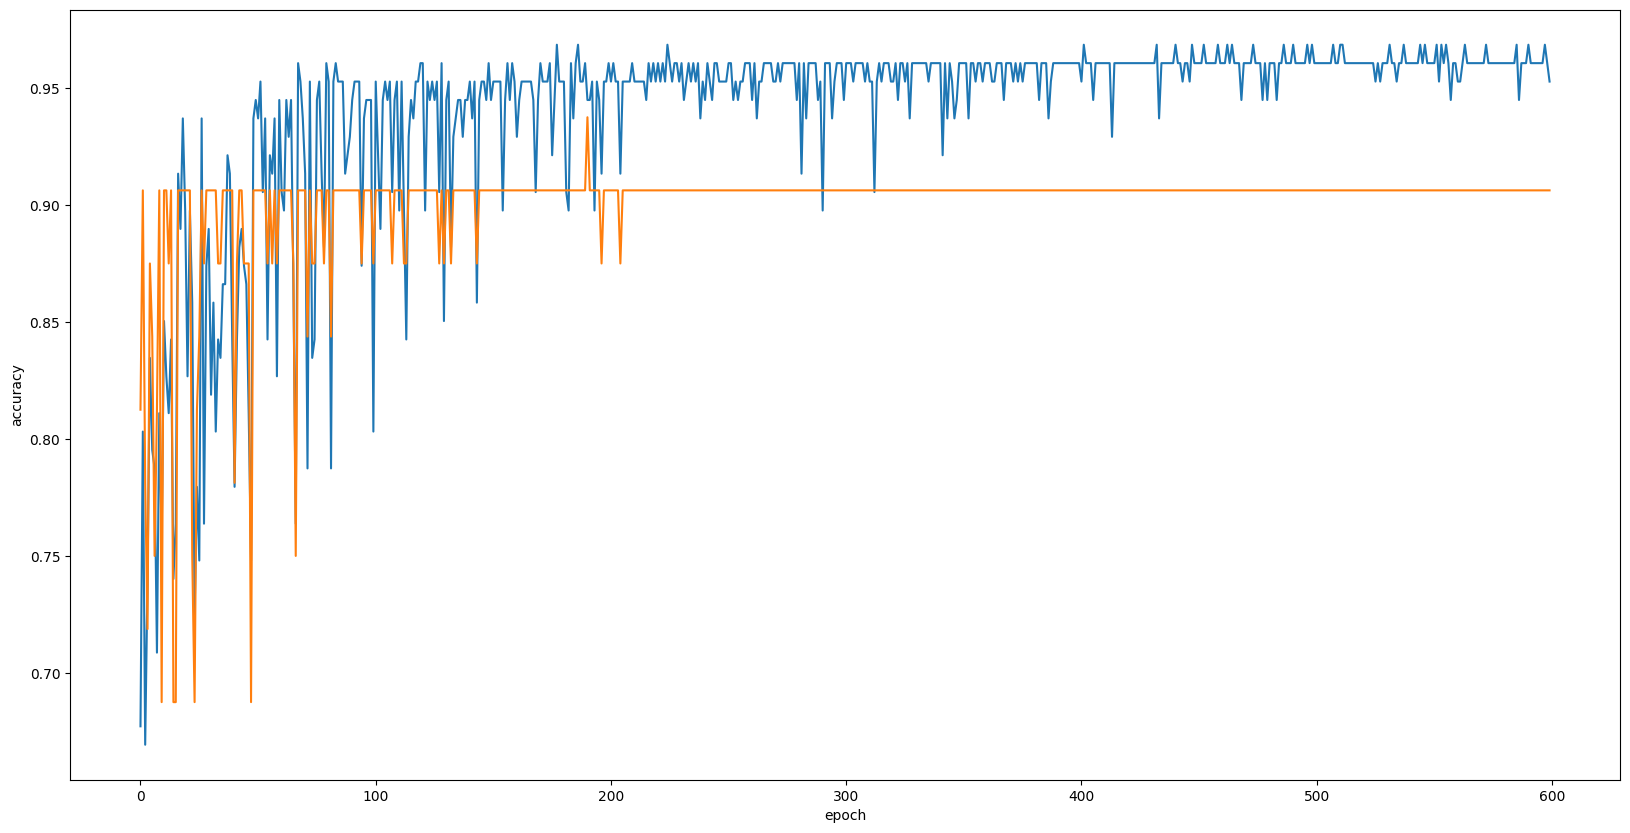

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [31]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None)
sc.fit(train_scaled, train_target)

,loss,'log_loss'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,100
,tol,None
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [32]:
print("훈련세트:", sc.score(train_scaled, train_target))
print("테스트세트:", sc.score(test_scaled, test_target))

훈련세트: 0.952755905511811
테스트세트: 0.90625


In [34]:
# GridSearchCV -> 최적 하이퍼 파라미터 찾아보기

from sklearn.model_selection import GridSearchCV

params = {
    'max_iter': np.arange(50, 1000),
    'tol': np.arange(0.0001, 1, 0.0001),
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

sc = SGDClassifier(loss='log_loss')
gs = GridSearchCV(sc, params, n_jobs=-1)

In [35]:
gs.fit(train_scaled, train_target)

c:\Users\admin\Desktop\김문수2\ai_class_source\09 핀테크 머신러닝과 딥러닝 이해\source\.venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


KeyboardInterrupt: 

In [36]:
# RandomizedSearchCV

from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

prams = {
    'max_iter': randint(50, 1000),
    'tol': uniform(0.0001, 1),
    'alpha': uniform(0.001, 100)
}

In [38]:
sc = SGDClassifier(loss='log_loss')
rs = RandomizedSearchCV(sc, params, n_iter=100, n_jobs=-1, random_state=42)

In [39]:
rs.fit(train_scaled, train_target)

c:\Users\admin\Desktop\김문수2\ai_class_source\09 핀테크 머신러닝과 딥러닝 이해\source\.venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


,estimator,SGDClassifier(loss='log_loss')
,param_distributions,"{'alpha': [0.0001, 0.001, ...], 'max_iter': array([ 50, ..., 999]), 'tol': array([1.000e...shape=(9999,))}"
,n_iter,100
,scoring,None
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [40]:
rs.best_params_

{'tol': np.float64(0.0111), 'max_iter': np.int64(196), 'alpha': 0.001}

In [41]:
model = rs.best_estimator_
model

,loss,'log_loss'
,penalty,'l2'
,alpha,0.001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,np.int64(196)
,tol,np.float64(0.0111)
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [43]:
print("학습 세트 : ", model.score(train_scaled, train_target))
print("테스트 세트 : ", model.score(test_scaled, test_target))

학습 세트 :  0.8976377952755905
테스트 세트 :  0.90625


In [44]:
# 5-fold 검증 값 cv_results_
rs.cv_results_

{'mean_fit_time': array([0.00819941, 0.01039605, 0.00920124, 0.00799847, 0.00600104,
        0.00540018, 0.00519958, 0.00460005, 0.00520024, 0.00520563,
        0.00319486, 0.00420399, 0.00440111, 0.00539994, 0.00440211,
        0.00299287, 0.00480027, 0.00419903, 0.00360508, 0.00399952,
        0.00359921, 0.00430346, 0.00500946, 0.00480943, 0.00500956,
        0.00350261, 0.00380416, 0.00440574, 0.00440273, 0.00499806,
        0.00500069, 0.00420094, 0.00510731, 0.00501256, 0.00430684,
        0.00439153, 0.00550342, 0.00490689, 0.00450735, 0.00630636,
        0.0060113 , 0.00699906, 0.0044014 , 0.00500007, 0.00420084,
        0.00439963, 0.00519919, 0.00460443, 0.00479984, 0.00559931,
        0.00440331, 0.00479989, 0.00479913, 0.00479994, 0.004602  ,
        0.0044003 , 0.00320106, 0.00421371, 0.0041955 , 0.00650673,
        0.00499878, 0.00570316, 0.00410719, 0.00459809, 0.00440006,
        0.00599957, 0.00460062, 0.00470214, 0.00450296, 0.00419788,
        0.00450578, 0.00420079,